[*********************100%%**********************]  1 of 1 completed


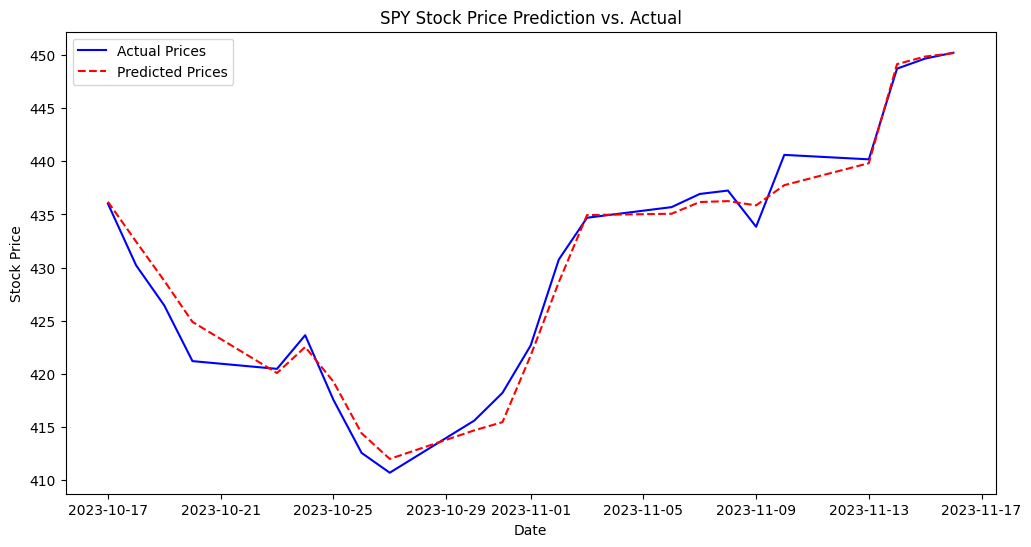

Mean Square Error:  2.691708264677715
OOB error: 0.000


In [1]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

start_date = '1993-01-29'
end_date = '2023-11-17'
stock_symbol = 'SPY'

df = yf.download(stock_symbol, start=start_date, end=end_date)
df = df.drop(['Adj Close'], axis=1)
df = df.dropna()

X = df.drop('Close', axis=1)  # Features
y = df['Close']  # Target variable

split_date = '2023-10-17'
train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]

# Train Model
X_train, y_train = train_data.drop('Close', axis=1), train_data['Close']
X_test, y_test = test_data.drop('Close', axis=1), test_data['Close']
rf_model = RandomForestRegressor(n_estimators=100, oob_score = True, random_state=42)
rf_model.fit(X_train, y_train)

# Testing
y_pred = rf_model.predict(X_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('SPY Stock Price Prediction vs. Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

print('Mean Square Error: ', mean_squared_error(y_test,y_pred))

# OOB error
oob_error = 1 - rf_model.oob_score_
print(f'OOB error: {oob_error:.3f}')


The above is not very useful because only the open price is known, so need

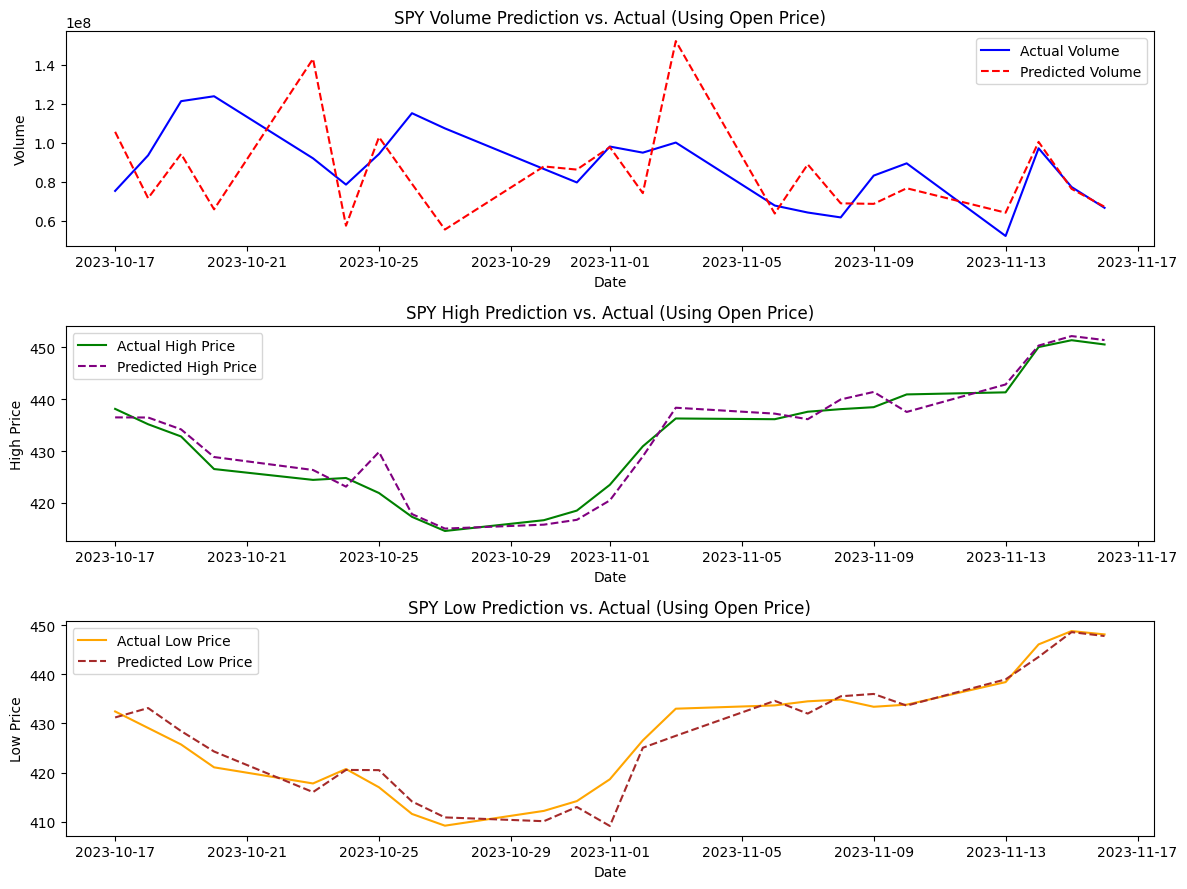

In [2]:
target_volume = 'Volume'
target_high = 'High'
target_low = 'Low'

# Extract features and target variables
X = df[['Open']]
y_volume = df[target_volume]
y_high = df[target_high]
y_low = df[target_low]

# Split the data into training and testing sets
split_date = '2023-10-17'
train_data = df[df.index < split_date]
test_data = df[df.index >= split_date]

X_train, y_train_volume, y_train_high, y_train_low = (
    train_data[['Open']],
    train_data[target_volume],
    train_data[target_high],
    train_data[target_low]
)
X_test, y_test_volume, y_test_high, y_test_low = (
    test_data[['Open']],
    test_data[target_volume],
    test_data[target_high],
    test_data[target_low]
)

# Volume Model
rf_volume = RandomForestRegressor(n_estimators=100, random_state=42)
rf_volume.fit(X_train, y_train_volume)
volume_predictions = rf_volume.predict(X_test)

# High Price Model
rf_high = RandomForestRegressor(n_estimators=100, random_state=42)
rf_high.fit(X_train, y_train_high)
high_price_predictions = rf_high.predict(X_test)

# Low Price Model
rf_low = RandomForestRegressor(n_estimators=100, random_state=42)
rf_low.fit(X_train, y_train_low)
low_price_predictions = rf_low.predict(X_test)

# Plotting
plt.figure(figsize=(12, 9))

# Plot Actual and Predicted Volume
plt.subplot(3, 1, 1)
plt.plot(test_data.index, y_test_volume, label='Actual Volume', color='blue')
plt.plot(test_data.index, volume_predictions, label='Predicted Volume', color='red', linestyle='--')
plt.title(f'SPY {target_volume} Prediction vs. Actual (Using Open Price)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Plot Actual and Predicted High Price
plt.subplot(3, 1, 2)
plt.plot(test_data.index, y_test_high, label='Actual High Price', color='green')
plt.plot(test_data.index, high_price_predictions, label='Predicted High Price', color='purple', linestyle='--')
plt.title(f'SPY {target_high} Prediction vs. Actual (Using Open Price)')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()

# Plot Actual and Predicted Low Price
plt.subplot(3, 1, 3)
plt.plot(test_data.index, y_test_low, label='Actual Low Price', color='orange')
plt.plot(test_data.index, low_price_predictions, label='Predicted Low Price', color='brown', linestyle='--')
plt.title(f'SPY {target_low} Prediction vs. Actual (Using Open Price)')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()

plt.tight_layout()
plt.show()


                  Open        High         Low        Volume
Date                                                        
2023-10-17  432.809998  436.500699  431.227302  1.056141e+08
2023-10-18  434.190002  436.480201  433.142607  7.161140e+07
2023-10-19  430.950012  434.186302  428.457310  9.428075e+07
2023-10-20  425.980011  428.858000  424.298704  6.588851e+07
2023-10-23  419.609985  426.358793  416.042401  1.430127e+08
2023-10-24  422.649994  423.145699  420.550604  5.750258e+07
2023-10-25  421.890015  429.826801  420.512104  1.029000e+08
2023-10-26  416.450012  417.856594  414.137805  7.897987e+07
2023-10-27  414.190002  415.060200  410.894402  5.553631e+07
2023-10-30  413.559998  415.818698  410.121400  8.787235e+07
2023-10-31  416.179993  416.751195  413.013409  8.625690e+07
2023-11-01  419.200012  420.496192  409.150003  9.777980e+07
2023-11-02  426.579987  428.975637  425.063111  7.419457e+07
2023-11-03  433.140015  438.363900  427.493193  1.521172e+08
2023-11-06  435.470001  

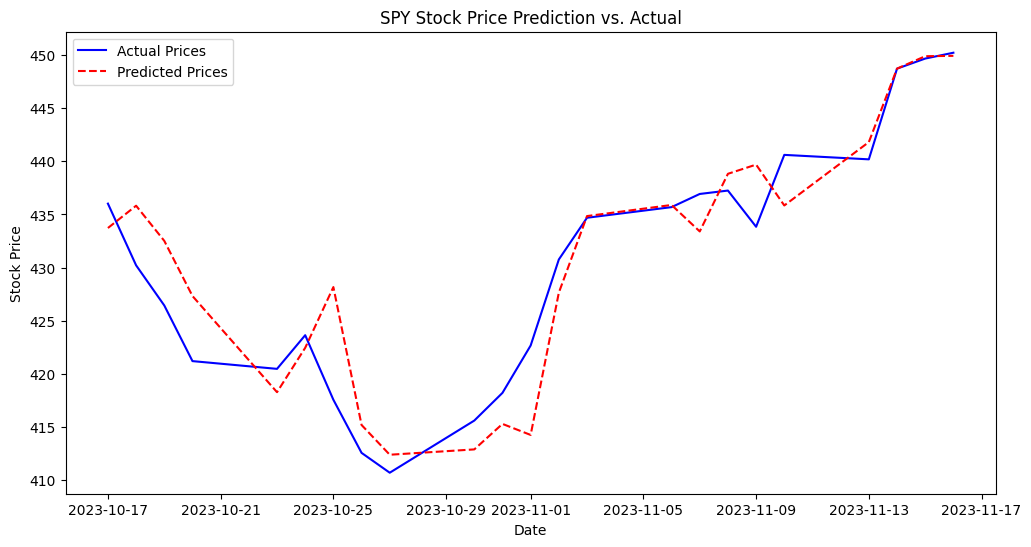

Mean Square Error:  17.883386215956016


In [ ]:

# Create a DataFrame with the test data and predictions
test_matrix = pd.DataFrame({
    'Open': X_test['Open'].values,
    'High': high_price_predictions,
    'Low': low_price_predictions,
    'Volume': volume_predictions,
}, index=X_test.index)

print(test_matrix)
# Make predictions on the test set
y_pred = rf_model.predict(test_matrix)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Prices', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('SPY Stock Price Prediction vs. Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
print('Mean Square Error: ', mean_squared_error(y_test,y_pred))
